In [1]:

import pandas as pd
import numpy as np
df = pd.read_csv('data/DATOS_TODOS.csv')

In [2]:
#Se definen variables de entrada 'X' y salida 'y'
feature_cols = ['DTBZ']
X = df[feature_cols]
y = df.ESTADO

In [3]:
# Divide 'X' y 'y' en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#X2_test = scaler.transform(X2_test)

In [4]:
# Entrena el modelo de clasificación de Redes Neuronales en el conjunto de entrenamiento
from sklearn.neural_network import MLPClassifier
#mlp=MLPClassifier(hidden_layer_sizes=(12,12,12), max_iter=500, alpha=0.0001, solver='adam', random_state=1, tol=0.000000001)
mlp = MLPClassifier(hidden_layer_sizes=(6,6,6,6),solver='adam',max_iter=6000)

# Aprende la relación entre el conjunto de entrada y salida del conjunto de entrenamiento
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 6, 6, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=6000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [5]:
#Realiza predicciones de clase para el conjunto de pruebas
y_pred_class=mlp.predict(X_test)

#Muestra métricas del clasificador
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.85      0.73      0.79      1419
          1       0.87      0.93      0.90      2735

avg / total       0.86      0.86      0.86      4154



### PRUEBA EN OTRO DATASET

In [6]:
#Carga archivo prueba
df2 = pd.read_csv('data/prueba1.csv')
X2 =df2['DTBZ']

In [7]:
#y_pred_class = mlp.predict(X2_test)
#print(classification_report(y_test, y_pred_class))

### Predicción inicial

In [8]:
# Calcula valor de predicción
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8644679826673086


In [9]:
# Examina la distribución de clases del conjunto de pruebas
y_test.value_counts()

1    2735
0    1419
Name: ESTADO, dtype: int64

In [10]:
# Calcula el porcentaje de 'unos' presentes en el conjunto
y_test.mean()

0.6584015406836784

In [11]:
# Calcula el porcentaje de 'ceros' presentes en el conjunto prueba
1 - y_test.mean()

0.3415984593163216

In [12]:
# Calcula 'Null accuracy' (En problemas binarios)
max(y_test.mean(), 1 - y_test.mean())

0.6584015406836784

In [13]:
# Calcula 'Null accuracy' (Para problemas de clasificación multi-clase)
y_test.value_counts().head(1) / len(y_test)

1    0.658402
Name: ESTADO, dtype: float64

In [14]:
# Muestra las primeras 25 respuestas verdaderas y predichas
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0]
Pred: [1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0]


### Matriz de Confusión

<img src= "images/matriz_confusion.png" width="200" height="200"/>

In [15]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1038  381]
 [ 182 2553]]


In [16]:
# Guarda la matriz de confusion y la secciona en 4 partes
confusion = metrics.confusion_matrix(y_test, y_pred_class)
VP = confusion[1, 1]
VN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [17]:
print((VP + VN) / float(VP + VN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.8644679826673086
0.8644679826673086


### Error inicial de clasificación

In [18]:
#Error de Clasificación (Tasa de clasificación errónea)
print((FP + FN) / float(VP + VN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.13553201733269138
0.13553201733269138


### Sensibilidad

In [19]:
#Sensibilidad (Detección de casos positivos)
print(VP / float(VP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.93345521023766
0.93345521023766


### Especificidad

In [20]:
#Especificiadad: Cuando el valor real es negativo, ¿con qué frecuencia es correcta la predicción?
print(VN / float(VN + FP))

0.7315010570824524


In [21]:
#Tasa Falso Positivo
print(FP / float(VN + FP))

0.26849894291754756


In [22]:
#Precisión (En casos positivos)
print(VP / float(VP + FP))
#print(metrics.precision_score(y_test, y_pred_class))

0.8701431492842536


In [23]:
# Muestra la predicción de las primeras 10 respuestas
mlp.predict(X_test)[0:10]

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [24]:
# Muestra las primeras 10 probabilidades predichas de pertenencia a clases
mlp.predict_proba(X_test)[0:10, :]

array([[0.04403354, 0.95596646],
       [0.03527751, 0.96472249],
       [0.94118764, 0.05881236],
       [0.11875244, 0.88124756],
       [0.94908246, 0.05091754],
       [0.93920263, 0.06079737],
       [0.91264474, 0.08735526],
       [0.00874858, 0.99125142],
       [0.8993191 , 0.1006809 ],
       [0.10486461, 0.89513539]])

In [25]:
# Muestra las primeras 10 probabilidades predichas para la clase 1
mlp.predict_proba(X_test)[0:10, 1]

array([0.95596646, 0.96472249, 0.05881236, 0.88124756, 0.05091754,
       0.06079737, 0.08735526, 0.99125142, 0.1006809 , 0.89513539])

In [26]:
y_pred_prob = mlp.predict_proba(X_test)[:, 1]

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

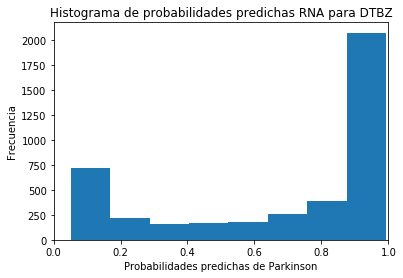

In [28]:
# histograma de probabilidades predichas
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histograma de probabilidades predichas RNA para DTBZ')
plt.xlabel('Probabilidades predichas de Parkinson')
plt.ylabel('Frecuencia')
plt.savefig('Histo_nn_DTBZ.png')

In [29]:
# predice Parkinson si la probabilidad pronosticada es mayor a 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [30]:
# Muestra las primeras 10 probabilidades predichas
y_pred_prob[0:10]

array([0.95596646, 0.96472249, 0.05881236, 0.88124756, 0.05091754,
       0.06079737, 0.08735526, 0.99125142, 0.1006809 , 0.89513539])

In [31]:
# Matriz de confusión previa (umbral por defecto 0.5)
print(confusion)

[[1038  381]
 [ 182 2553]]


Se **reduce el umbral** para predecir Parkinson para **incrementar la sensibilidad** del clasificador

In [36]:
# Nueva matriz de confusión (Umbral de 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 826  529]
 [  85 2714]]


In [32]:
#Guarda nueva matriz de confusión (umbral 0.3)
nueva_conf = metrics.confusion_matrix(y_test, y_pred_class)
VP2 = nueva_conf[1, 1]
VN2 = nueva_conf[0, 0]
FP2 = nueva_conf[0, 1]
FN2 = nueva_conf[1, 0]

In [33]:
# Ha incrementado la Sensibilidad (Solía ser 0.93)
print(VP2 / float(VP2 + FN2))
print(metrics.recall_score(y_test, y_pred_class))

0.9641681901279707
0.9641681901279707


In [34]:
# Ha disminuído la Especificidad (Solía ser 0.75)
print(VN2 / float(VN2 + FP2))

0.6088794926004228


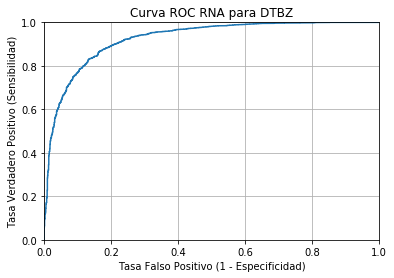

In [35]:
# IMPORTANTE: Pareja ordenada (valores reales, probabilidades predichas)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC RNA para DTBZ')
plt.xlabel('Tasa Falso Positivo (1 - Especificidad)')
plt.ylabel('Tasa Verdadero Positivo (Sensibilidad)')
plt.grid(True)
#plt.savefig('ROC_nn_DTBZ')

In [36]:
def evaluate_threshold(threshold):
    print('Sensitividad:', tpr[thresholds > threshold][-1])
    print('Especificidad:', 1 - fpr[thresholds > threshold][-1])

In [37]:
evaluate_threshold(0.5)

Sensitividad: 0.93345521023766
Especificidad: 0.7315010570824525


In [38]:
evaluate_threshold(0.3)

Sensitividad: 0.9638025594149908
Especificidad: 0.6088794926004228


In [39]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9246152696558716


In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, y, cv=10, scoring='roc_auc').mean()

0.9156514292344516